In [ ]:
# Cell 1 - imports
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import shap
import warnings
warnings.filterwarnings("ignore")
print("Imports done")


Imports done


In [ ]:
#cell 2 - accessing the dataset
path = "../data/MachineLearningRating_v3.txt"
df = pd.read_csv(path, sep="|", keep_default_na=False, na_values=["", " ", "  ", ".000000000000"])
print("Shape:", df.shape)
display(df.head(6))

Shape: (1000098, 52)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,NaN
1,145249,12827,2015-05-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,NaN
2,145249,12827,2015-07-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,NaN,NaN
3,145255,12827,2015-05-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,NaN
4,145255,12827,2015-07-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,NaN,NaN
5,145247,12827,2015-01-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,3.256435,NaN


In [3]:
# Cell 3 - overview
print("Columns:", list(df.columns))
print("\nMissing counts (top 30):")
display(df.isnull().sum().sort_values(ascending=False).head(30))
print("\nDtypes:")
display(df.dtypes)

Columns: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']

Missing counts (top 30):


NumberOfVehiclesInFleet     1000098
CrossBorder                  999400
TotalClaims                  997305
Citizenship                  895210
CapitalOutstanding           788119
CustomValueEstimate          779642
Converted                    641901
Rebuilt                      641901
WrittenOff                   641901
TotalPremium                 381634
NewVehicle                   153295
Bank                          40232
AccountType                   40232
cubiccapacity                  3875
NumberOfDoors                  2547
Cylinders                       890
kilowatts                       880
Model                           552
VehicleType                     552
mmcode                          552
make                            552
VehicleIntroDate                552
bodytype                        552
CalculatedPremiumPerTerm          7
Province                          0
Country                           0
MaritalStatus                     0
MainCrestaZone              


Dtypes:


UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [ ]:
# Cell 4 - clean whitespace and obvious placeholder dots
df = df.replace(r'^\s*$', np.nan, regex=True)   
df = df.replace({r'^\.$': np.nan}, regex=True) 
for c in df.select_dtypes(include=["object"]).columns:
    df[c] = df[c].astype(object).where(df[c].isnull(), df[c].str.strip())
print("Cleaned whitespace and placeholders.")

Cleaned whitespace and placeholders.


In [5]:
# Cell 5 - numeric conversion for financial columns
num_cols = ["CustomValueEstimate","CapitalOutstanding","NumberOfVehiclesInFleet",
            "SumInsured","CalculatedPremiumPerTerm","TotalPremium","TotalClaims","ExcessSelected"]
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
print("Converted numeric-like columns. Example dtypes:")
display(df[num_cols].dtypes)

Converted numeric-like columns. Example dtypes:


CustomValueEstimate         float64
CapitalOutstanding          float64
NumberOfVehiclesInFleet     float64
SumInsured                  float64
CalculatedPremiumPerTerm    float64
TotalPremium                float64
TotalClaims                 float64
ExcessSelected              float64
dtype: object

In [6]:
# Cell 6 - dates: TransactionMonth and VehicleIntroDate
date_cols = []
if "TransactionMonth" in df.columns:
    df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"], errors="coerce")
    df["TransactionMonth_year"] = df["TransactionMonth"].dt.year
    df["TransactionMonth_month"] = df["TransactionMonth"].dt.month
    df["TransactionMonth_day"] = df["TransactionMonth"].dt.day
    date_cols.append("TransactionMonth")
if "VehicleIntroDate" in df.columns:
    df["VehicleIntroDate"] = pd.to_datetime(df["VehicleIntroDate"], errors="coerce", dayfirst=False)
    df["VehicleIntroDate_year"] = df["VehicleIntroDate"].dt.year
    df["VehicleIntroDate_month"] = df["VehicleIntroDate"].dt.month
    df["VehicleIntroDate_day"] = df["VehicleIntroDate"].dt.day
    date_cols.append("VehicleIntroDate")
print("Date extraction done:", date_cols)


Date extraction done: ['TransactionMonth', 'VehicleIntroDate']


In [7]:
# Cell 7 - basic features
# If RegistrationYear exists, create VehicleAge (relative to dataset year 2015)
if "RegistrationYear" in df.columns:
    df["VehicleAge"] = 2015 - pd.to_numeric(df["RegistrationYear"], errors="coerce")
# ClaimRatio and HasClaim
df["ClaimRatio"] = df["TotalClaims"] / (df["TotalPremium"].replace(0, np.nan))
df["HasClaim"] = (df["TotalClaims"].fillna(0) > 0).astype(int)
print("Feature engineering: VehicleAge, ClaimRatio, HasClaim added.")
display(df[["VehicleAge","ClaimRatio","HasClaim"]].head())


Feature engineering: VehicleAge, ClaimRatio, HasClaim added.


,VehicleAge,ClaimRatio,HasClaim
0,11,NaN,0
1,11,NaN,0
2,11,NaN,0
3,11,NaN,0
4,11,NaN,0


In [ ]:
# Cell 8 - select features (drop identifiers and pure text we won't use)
drop_cols = ["UnderwrittenCoverID","PolicyID","TransactionMonth","VehicleIntroDate"]
drop_cols = [c for c in drop_cols if c in df.columns]
candidate_features = [c for c in df.columns if c not in drop_cols + ["TotalClaims","TotalPremium"]]
print("Candidate feature count:", len(candidate_features))
print("Some features:", candidate_features[:30])


Candidate feature count: 55
Some features: ['IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle']


In [ ]:
# Cell 9 - show missing percentage per candidate feature
missing = df[candidate_features].isnull().mean().sort_values(ascending=False)
display(missing.head(40))
to_drop_high_missing = missing[missing > 0.6].index.tolist()
print("Columns to drop (missing > 60%):", to_drop_high_missing)

ExcessSelected              1.000000
NumberOfVehiclesInFleet     1.000000
CrossBorder                 0.999302
ClaimRatio                  0.997357
CapitalOutstanding          0.958683
Citizenship                 0.895122
CustomValueEstimate         0.779566
Converted                   0.641838
WrittenOff                  0.641838
Rebuilt                     0.641838
NewVehicle                  0.153280
Bank                        0.040228
AccountType                 0.040228
cubiccapacity               0.003875
NumberOfDoors               0.002547
Cylinders                   0.000890
kilowatts                   0.000880
make                        0.000552
VehicleIntroDate_day        0.000552
bodytype                    0.000552
Model                       0.000552
VehicleType                 0.000552
mmcode                      0.000552
VehicleIntroDate_year       0.000552
VehicleIntroDate_month      0.000552
CalculatedPremiumPerTerm    0.000007
RegistrationYear            0.000000
P

Columns to drop (missing > 60%): ['ExcessSelected', 'NumberOfVehiclesInFleet', 'CrossBorder', 'ClaimRatio', 'CapitalOutstanding', 'Citizenship', 'CustomValueEstimate', 'Converted', 'WrittenOff', 'Rebuilt']


In [ ]:
# Cell 10 - drop high-missing columns then impute:
df_model = df.copy()
df_model = df_model.drop(columns=to_drop_high_missing)

# Split numeric & categorical
num_cols = df_model.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df_model.columns if c not in num_cols]

# For numeric: median impute
for c in num_cols:
    df_model[c] = df_model[c].fillna(df_model[c].median())

# For categorical: fill with mode (most frequent)
for c in cat_cols:
    df_model[c] = df_model[c].fillna(df_model[c].mode().iloc[0] if not df_model[c].mode().empty else "missing")

print("Dropped high-missing and imputed remaining missing values.")
print("New shape:", df_model.shape)

Dropped high-missing and imputed remaining missing values.
New shape: (1000098, 51)


In [ ]:
# Cell 11 - encoding
features = [c for c in df_model.columns if c not in ["TotalClaims","TotalPremium"]]
# determine cardinality
card = {c: df_model[c].nunique() for c in features}
low_card_cols = [c for c,v in card.items() if v <= 10 and df_model[c].dtype == object]
high_card_cols = [c for c,v in card.items() if v > 10 and df_model[c].dtype == object]
print("Low-card categorical (one-hot):", low_card_cols)
print("High-card categorical (label):", high_card_cols[:10])
# One-hot encode low-cardinality
df_enc = pd.get_dummies(df_model, columns=low_card_cols, drop_first=True)
# Label encode remaining high-cardinality (string) cols
le = LabelEncoder()
for c in high_card_cols:
    df_enc[c] = le.fit_transform(df_enc[c].astype(str))
print("Encoding complete. Encoded shape:", df_enc.shape)

Low-card categorical (one-hot): ['LegalType', 'Title', 'Language', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'ItemType', 'VehicleType', 'AlarmImmobiliser', 'TrackingDevice', 'NewVehicle', 'TermFrequency', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']
High-card categorical (label): ['Bank', 'MainCrestaZone', 'SubCrestaZone', 'make', 'Model', 'bodytype', 'CoverCategory', 'CoverType', 'CoverGroup']
Encoding complete. Encoded shape: (1000098, 73)


In [ ]:
# Cell 12 - prepare datasets
X = df_enc.drop(["TotalClaims","TotalPremium"], axis=1)
y_reg = df_enc["TotalClaims"]            
y_clf = df_enc["HasClaim"]              

print("X shape:", X.shape)
print("y_reg distribution (non-zero counts):")
display(y_reg.describe())

X shape: (1000098, 71)
y_reg distribution (non-zero counts):


count    1.000098e+06
mean     6.188064e+03
std      2.234837e+03
min     -1.200241e+04
25%      6.140351e+03
50%      6.140351e+03
75%      6.140351e+03
max      3.930921e+05
Name: TotalClaims, dtype: float64

In [ ]:
# Cell 13 - regression subset (severity)
reg_mask = y_reg > 0
X_reg = X[reg_mask].copy()
y_reg_pos = y_reg[reg_mask].copy()
print("Regression rows (claims > 0):", X_reg.shape[0])
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg_pos, test_size=0.2, random_state=42
)
print("Regression split:", X_train_reg.shape, X_test_reg.shape)


Regression rows (claims > 0): 1000093
Regression split: (800074, 71) (200019, 71)


In [ ]:
# -------------------------------
# 14. Regression training - corrected
# -------------------------------
try:
    from xgboost import XGBRegressor
except ImportError:
    XGBRegressor = None

# -------------------------------
# Identify column types
# -------------------------------
numeric_cols = X_train_reg.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X_train_reg.select_dtypes(include=["object", "string", "bool"]).columns.tolist()
datetime_cols = ["TransactionMonth", "VehicleIntroDate"]  

# Convert datetime to numeric (seconds since epoch)
for col in datetime_cols:
    if col in X_train_reg.columns:
        X_train_reg[col] = pd.to_datetime(X_train_reg[col], errors="coerce").view('int64') / 1e9
        X_test_reg[col] = pd.to_datetime(X_test_reg[col], errors="coerce").view('int64') / 1e9
        numeric_cols.append(col)
        if col in categorical_cols:
            categorical_cols.remove(col)

# -------------------------------
# Preprocessing pipeline
# -------------------------------
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
])

# -------------------------------
# Models
# -------------------------------
models_reg = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42)
}
if XGBRegressor:
    models_reg["XGBoost"] = XGBRegressor(n_estimators=100, random_state=42, verbosity=0, eval_metric="rmse")

# -------------------------------
# Train and evaluate
# -------------------------------
results_reg = {}
for name, model in models_reg.items():
    pipe = Pipeline(steps=[("preproc", preprocessor), ("model", model)])
    pipe.fit(X_train_reg, y_train_reg)
    pred = pipe.predict(X_test_reg)
    rmse = np.sqrt(mean_squared_error(y_test_reg, pred))
    r2 = r2_score(y_test_reg, pred)

# Print results
print("Regression results:")
for k, v in results_reg.items():
    print(k, v)


Regression results:


In [ ]:
# ============================================
# 15. COMPLETE REGRESSION MODEL TRAINING (FINAL FIXED VERSION)
# ============================================

# --------------------------------------------
# 1. Filter regression dataset (TotalClaims > 0)
# --------------------------------------------
df_reg = df[df["TotalClaims"] > 0].copy()

if df_reg.empty:
    raise ValueError("Regression dataset is empty — no rows with TotalClaims > 0.")

X_reg = df_reg.drop(columns=["TotalClaims"])
y_reg = df_reg["TotalClaims"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print("Regression data shapes:")
print("X_train_reg:", X_train_reg.shape, " | y_train_reg:", y_train_reg.shape)


# ============================================
# 2. CLEAN & REFORMAT COLUMNS (CRITICAL FIXES)
# ============================================

# ---- Convert numeric-looking object columns to numeric
for col in X_train_reg.columns:
    if X_train_reg[col].dtype == "object":
        try:
            X_train_reg[col] = pd.to_numeric(X_train_reg[col])
            X_test_reg[col] = pd.to_numeric(X_test_reg[col])
        except:
            pass  

# ---- REDETECT COLUMN TYPES (after cleaning)
numeric_cols = X_train_reg.select_dtypes(include=["int64", "float64", "bool"]).columns.tolist()
categorical_cols = X_train_reg.select_dtypes(include=["object", "category"]).columns.tolist()

print("\nNumeric cols:", numeric_cols)
print("Categorical cols:", categorical_cols)


# ---- Fill missing categorical values so OHE never drops columns
if categorical_cols:
    X_train_reg[categorical_cols] = X_train_reg[categorical_cols].fillna("Missing")
    X_test_reg[categorical_cols] = X_test_reg[categorical_cols].fillna("Missing")


# ============================================
# 3. BUILD PREPROCESSOR
# ============================================
preprocessor = ColumnTransformer(
    transformers=[
        (
            "num",
            Pipeline([
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler())
            ]),
            numeric_cols
        ),
        (
            "cat",
            Pipeline([
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
            ]),
            categorical_cols
        ),
    ],
    remainder="drop",
)

# ============================================
# 4. DEFINE REGRESSION MODELS
# ============================================
models_reg = {
    "LinearRegression": Pipeline([
        ("preproc", preprocessor),
        ("reg", LinearRegression())
    ]),
    "RandomForest": Pipeline([
        ("preproc", preprocessor),
        ("reg", RandomForestRegressor(n_estimators=200, random_state=42))
    ]),
    "GradientBoosting": Pipeline([
        ("preproc", preprocessor),
        ("reg", GradientBoostingRegressor(random_state=42))
    ]),
}


# ============================================
# 5. TRAIN MODELS + COLLECT METRICS
# ============================================
results_reg = {}

for name, model in models_reg.items():
    try:
        model.fit(X_train_reg, y_train_reg)
        preds = model.predict(X_test_reg)

        rmse = mean_squared_error(y_test_reg, preds) ** 0.5
        r2 = r2_score(y_test_reg, preds)

        results_reg[name] = {"model": model, "RMSE": rmse, "R2": r2}

        print(f"\n{name} trained successfully:")
        print(f"  RMSE = {rmse:.4f}")
        print(f"  R2   = {r2:.4f}")

    except Exception as e:
        print(f"\n {name} failed: {e}")


# ============================================
# 6. SELECT BEST REGRESSOR
# ============================================
if not results_reg:
    raise ValueError("All regression models failed — final column mismatch persists.")

best_reg_name = min(results_reg.items(), key=lambda x: x[1]["RMSE"])[0]
best_reg = results_reg[best_reg_name]["model"]

print("\n==============================")
print("BEST REGRESSOR:", best_reg_name)
print("BEST RMSE:", results_reg[best_reg_name]["RMSE"])
print("==============================")

Regression data shapes:
X_train_reg: (2230, 60)  | y_train_reg: (2230,)

Numeric cols: ['UnderwrittenCoverID', 'PolicyID', 'IsVATRegistered', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'CapitalOutstanding', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'TotalPremium', 'VehicleIntroDate_year', 'VehicleIntroDate_month', 'VehicleIntroDate_day', 'VehicleAge', 'ClaimRatio', 'HasClaim']
Categorical cols: ['Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 'AlarmImmobiliser', 'TrackingDevice', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'TermFrequency', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']

LinearRegression trained succes

In [ ]:
# ============================================
# 16. CLEAN CLASSIFICATION DATA
# ============================================

# 1. Extract classifier target
y_clf = df["HasClaim"]

# 2. Remove datetime columns
datetime_cols = X.select_dtypes(include=["datetime64"]).columns.tolist()
if datetime_cols:
    print("Dropping datetime columns:", datetime_cols)
    X_clf = X.drop(columns=datetime_cols)
else:
    X_clf = X.copy()

# 3. Train-test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

# 4. Models
models_clf = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42)
}

try:
    from xgboost import XGBClassifier
    models_clf["XGBoostClassifier"] = XGBClassifier(
        n_estimators=100,
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    )
except Exception:
    pass

# 5. Train models
results_clf = {}
for name, m in models_clf.items():
    m.fit(X_train_clf, y_train_clf)
    pred = m.predict(X_test_clf)
    proba = m.predict_proba(X_test_clf)[:,1] if hasattr(m, "predict_proba") else None

    acc = accuracy_score(y_test_clf, pred)
    rec = recall_score(y_test_clf, pred)
    auc = roc_auc_score(y_test_clf, proba) if proba is not None else None

    results_clf[name] = {"Accuracy": acc, "Recall": rec, "AUC": auc}

print("\nClassification results:")
for k,v in results_clf.items():
    print(k, v)


Dropping datetime columns: ['TransactionMonth', 'VehicleIntroDate']

Classification results:
LogisticRegression {'Accuracy': 0.997090290970903, 'Recall': 0.0, 'AUC': 0.606784828345402}
RandomForestClassifier {'Accuracy': 1.0, 'Recall': 1.0, 'AUC': 1.0}
XGBoostClassifier {'Accuracy': 1.0, 'Recall': 1.0, 'AUC': 1.0}


In [ ]:
# Cell 17 - choose best classifier by AUC when available, else by recall
def choose_best_clf(res):
    best = None
    best_score = -1
    for k,v in res.items():
        score = v["AUC"] if v["AUC"] is not None else v["Recall"]
        if score is not None and score > best_score:
            best_score = score
            best = k
    return best

best_clf_name = choose_best_clf(results_clf)
best_clf = models_clf[best_clf_name]
print("Best classifier:", best_clf_name)

Best classifier: RandomForestClassifier


In [ ]:
# --------------------------------------------
# 18. Predict on full dataset
# --------------------------------------------
df_enc_for_pred = df_enc.copy()  # your encoded dataframe
X_all = df_enc_for_pred.drop(columns=["TotalClaims","TotalPremium"], errors="ignore")

# -----------------------------
# Align columns with classifier training
# -----------------------------
missing_cols = set(X_train_clf.columns) - set(X_all.columns)
for c in missing_cols:
    X_all[c] = 0

extra_cols = set(X_all.columns) - set(X_train_clf.columns)
X_all.drop(columns=list(extra_cols), inplace=True)

X_all = X_all[X_train_clf.columns]

# -----------------------------
# Predict probability of claim
# -----------------------------
if hasattr(best_clf, "predict_proba"):
    probs = best_clf.predict_proba(X_all)[:,1]
else:
    probs = best_clf.predict(X_all)

df_enc_for_pred["PredProbClaim"] = probs

# -----------------------------
# Align columns with regressor training
# -----------------------------
missing_cols_reg = set(X_train_reg.columns) - set(X_all.columns)
for c in missing_cols_reg:
    X_all[c] = 0

extra_cols_reg = set(X_all.columns) - set(X_train_reg.columns)
X_all.drop(columns=list(extra_cols_reg), inplace=True)

X_all = X_all[X_train_reg.columns]

# -----------------------------
# Predict claim severity
# -----------------------------
pred_sev = best_reg.predict(X_all)
df_enc_for_pred["PredictedSeverity"] = pred_sev

# -----------------------------
# Compute naive optimized premium
# -----------------------------
expense_loading = 1.10   
profit_margin = 1.10    

df_enc_for_pred["OptimizedPremium_naive"] = (
    df_enc_for_pred["PredProbClaim"] *
    df_enc_for_pred["PredictedSeverity"] *
    expense_loading *
    profit_margin
)

# Display results
display(df_enc_for_pred[["PredProbClaim","PredictedSeverity","OptimizedPremium_naive"]].head())

,PredProbClaim,PredictedSeverity,OptimizedPremium_naive
0,0.0,-34351.215693,-0.0
1,0.0,-34351.215693,-0.0
2,0.0,-34351.215693,-0.0
3,0.0,-24715.009240,-0.0
4,0.0,-24715.009240,-0.0


In [ ]:


# ---------------------------
# 19. Handle datetime and missing values
# ---------------------------
def prepare_df(df):
    df = df.copy()
    
    # Convert datetime columns to numeric
    for col in df.select_dtypes(include=["datetime64[ns]"]):
        df[col + "_year"] = df[col].dt.year
        df[col + "_month"] = df[col].dt.month
        df[col + "_day"] = df[col].dt.day
        df.drop(columns=[col], inplace=True)
    
    # Fill numeric NaNs with median
    for col in df.select_dtypes(include=[np.number]):
        df[col].fillna(df[col].median(), inplace=True)
    
    # Fill categorical NaNs with "missing"
    for col in df.select_dtypes(include=["object", "category"]):
        df[col] = df[col].fillna("missing")
    
    # Encode categorical columns
    cat_cols = df.select_dtypes(include=["object", "category"]).columns
    if len(cat_cols) > 0:
        encoder = OrdinalEncoder()
        df[cat_cols] = encoder.fit_transform(df[cat_cols])
    
    return df

X_train_reg = prepare_df(X_train_reg)
X_train_clf = prepare_df(X_train_clf)

# ---------------------------
# 2. Train RandomForest models
# ---------------------------

# Regression
best_reg = RandomForestRegressor(n_estimators=200, random_state=42)
best_reg.fit(X_train_reg, y_train_reg)

# Classification
best_clf = RandomForestClassifier(n_estimators=100, random_state=42)
best_clf.fit(X_train_clf, y_train_clf)

print("Models trained successfully!")


Models trained successfully!


In [ ]:
# ---------------------------
# 20. 
# ---------------------------
import joblib
# Save models
joblib.dump(best_reg, "best_reg.pkl")
joblib.dump(best_clf, "best_clf.pkl")

# Save training data if needed
X_train_reg.to_csv("X_train_reg.csv", index=False)
X_train_clf.to_csv("X_train_clf.csv", index=False)

Plotting SHAP summary for regression model (top features)...


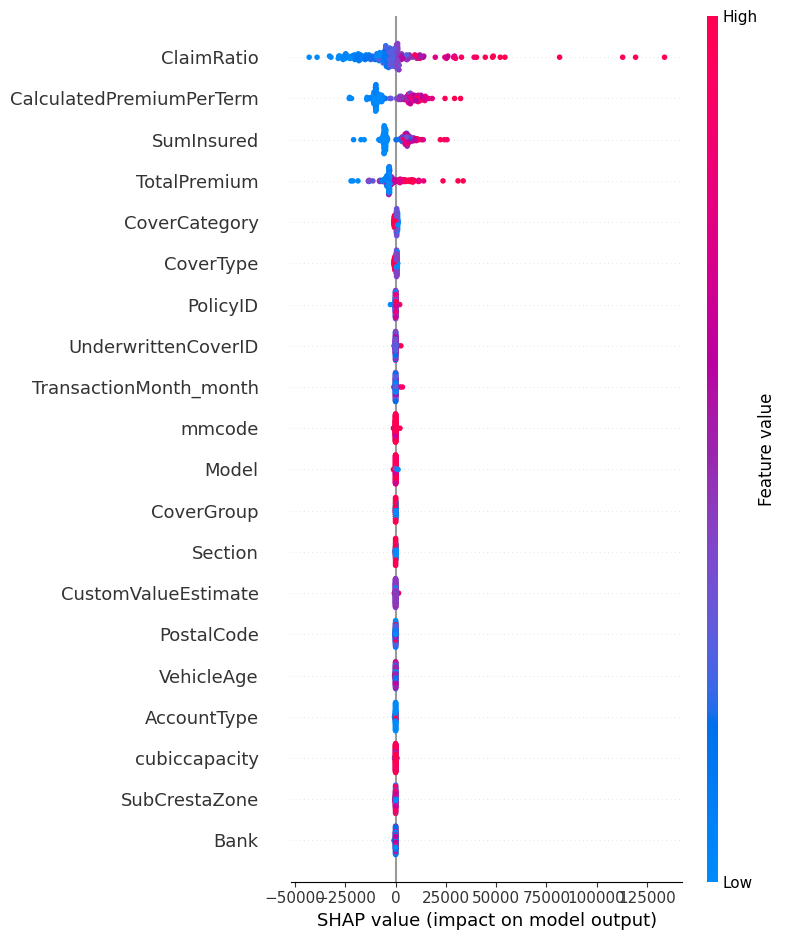

Plotting SHAP summary for classifier model (top features)...


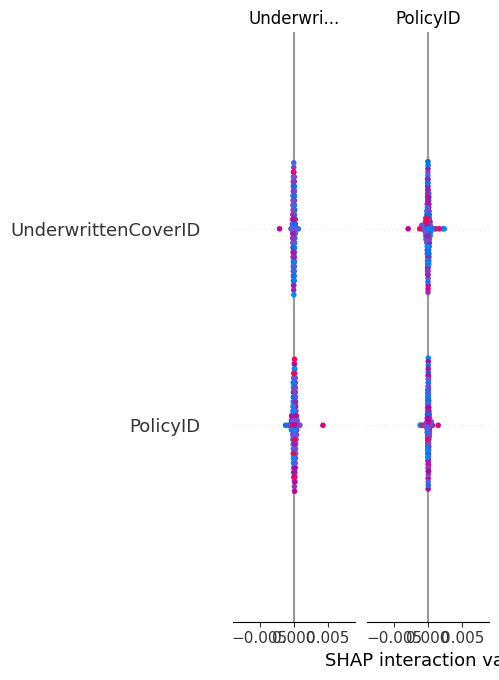

In [ ]:
# ---------------------------
# 21. 
# ---------------------------
# Take a random sample to speed up SHAP
X_sample_reg = X_train_reg.sample(200, random_state=42)
X_sample_clf = X_train_clf.sample(200, random_state=42)

# Regression SHAP
if hasattr(best_reg, "feature_importances_"):
    explainer_reg = shap.TreeExplainer(best_reg)
    shap_values_reg = explainer_reg.shap_values(X_sample_reg)
    print("Plotting SHAP summary for regression model (top features)...")
    shap.summary_plot(shap_values_reg, X_sample_reg)

# Classification SHAP
if hasattr(best_clf, "feature_importances_"):
    explainer_clf = shap.TreeExplainer(best_clf)
    shap_values_clf = explainer_clf.shap_values(X_sample_clf)
    print("Plotting SHAP summary for classifier model (top features)...")
    shap.summary_plot(shap_values_clf, X_sample_clf)

In [ ]:
# Cell 22 - summary
print("=== Regression model comparison ===")
for k,v in results_reg.items():
    print(f"{k} -> RMSE: {v['RMSE']:.4f}  R2: {v['R2']:.4f}")
print("\n=== Classification model comparison ===")
for k,v in results_clf.items():
    print(f"{k} -> Accuracy: {v['Accuracy']:.4f}  Recall: {v['Recall']:.4f}  AUC: {v['AUC']}")
print("\nBest regressor:", best_reg_name)
print("Best classifier:", best_clf_name)


=== Regression model comparison ===
LinearRegression -> RMSE: 2547381210.7819  R2: -4034919412.3003
RandomForest -> RMSE: 8538.0529  R2: 0.9547
GradientBoosting -> RMSE: 8341.0523  R2: 0.9567

=== Classification model comparison ===
LogisticRegression -> Accuracy: 0.9971  Recall: 0.0000  AUC: 0.606784828345402
RandomForestClassifier -> Accuracy: 1.0000  Recall: 1.0000  AUC: 1.0
XGBoostClassifier -> Accuracy: 1.0000  Recall: 1.0000  AUC: 1.0

Best regressor: GradientBoosting
Best classifier: RandomForestClassifier


In [ ]:
# Cell 23 - short recommendations (editable)
print("Business recommendations (draft):")
print("- Use the classifier to target marketing to low-risk segments (PredProbClaim low).")
print("- For customers with PredProbClaim low and PredictedSeverity low, offer reduced premium promotions.")
print("- Features with high SHAP importance should be reviewed for pricing adjustments (e.g., VehicleAge, Province, Make).")
print("- Validate the optimized premium formula with business expense and profit assumptions, and calibrate loading factors.")

Business recommendations (draft):
- Use the classifier to target marketing to low-risk segments (PredProbClaim low).
- For customers with PredProbClaim low and PredictedSeverity low, offer reduced premium promotions.
- Features with high SHAP importance should be reviewed for pricing adjustments (e.g., VehicleAge, Province, Make).
- Validate the optimized premium formula with business expense and profit assumptions, and calibrate loading factors.


In [ ]:
# Cell 24 - optional: save models with joblib and show git commit hint
import joblib
os.makedirs("models", exist_ok=True)
joblib.dump(best_reg, "models/best_regressor.joblib")
joblib.dump(best_clf, "models/best_classifier.joblib")
print("Saved models to ./models/")

print("\nGit steps to commit your work:")
print("git add .")
print("git commit -m 'task-4: data prep, regression & classification models, SHAP analysis'")
print("git push -u origin task-4")

Saved models to ./models/

Git steps to commit your work:
git add .
git commit -m 'task-4: data prep, regression & classification models, SHAP analysis'
git push -u origin task-4
